# 1. Import Libraries 

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# 2. Load & Explore Dataset 

In [7]:
iris_df = pd.read_csv('dataset/iris.csv')

In [8]:
iris_df.head()

,sepal_length,sepal_width,petal_length,petal_width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [9]:
iris_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   class         150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [11]:
iris_df['class'].value_counts()

class
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64

# 3. EDA

## (i) Histograms for Each Feature 

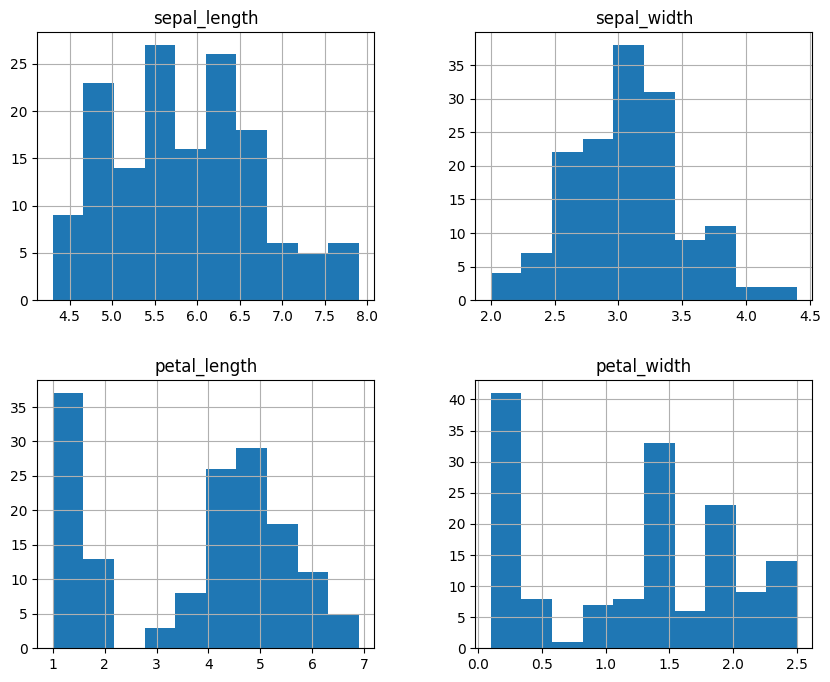

In [12]:
iris_df.hist(figsize=(10, 8))
plt.show()

## (ii) Box Plots for Feature Distributions by Class 

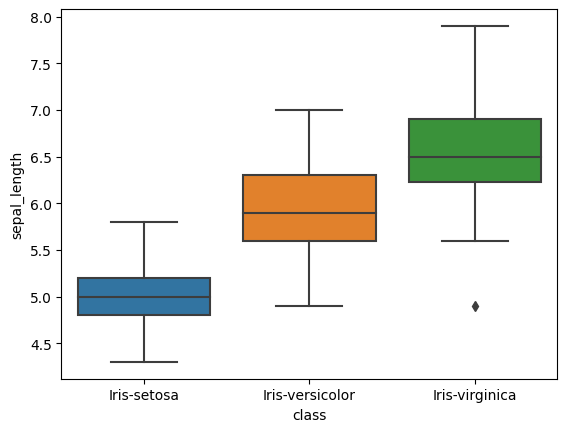

In [15]:
# Box plots for sepal length by species
sns.boxplot(x='class', y='sepal_length', data=iris_df)
plt.show()

## (iii) Pair Plots 

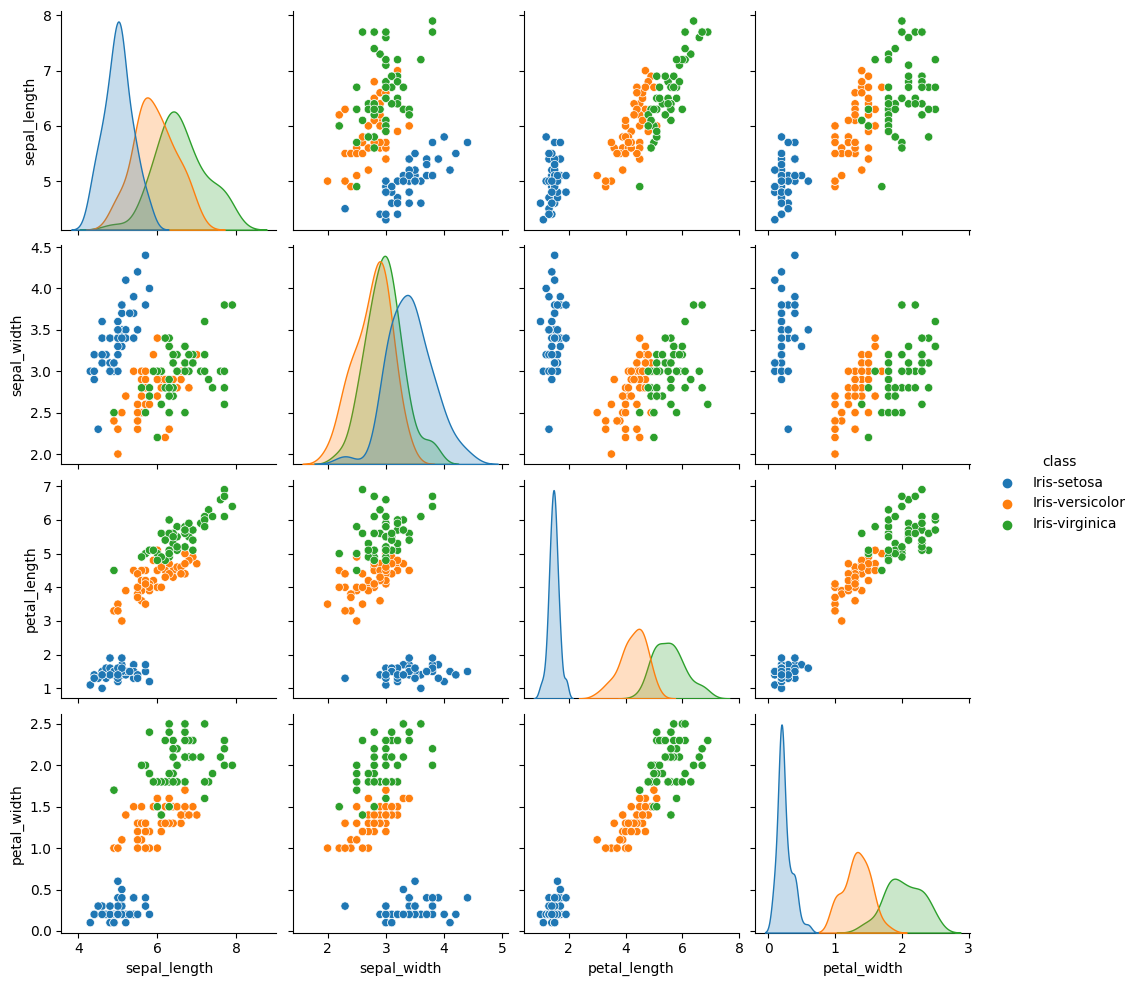

In [17]:
sns.pairplot(iris_df, hue='class')
plt.show()

## (iv) Correlation Heatmap 

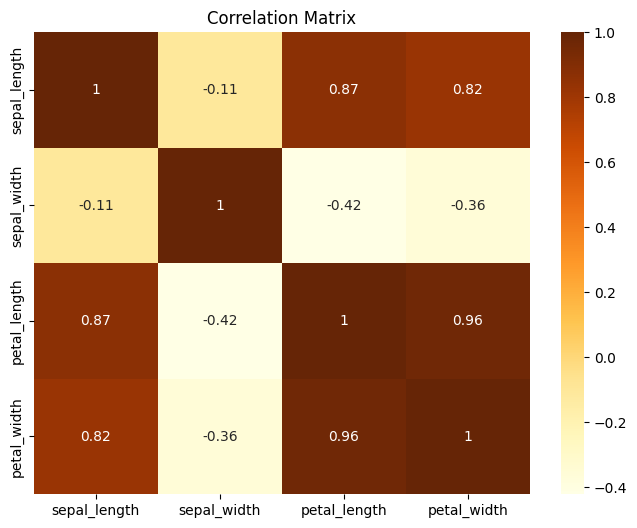

In [33]:
# Select only the numerical columns for the correlation matrix
numerical_columns = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
correlation_matrix = iris_df[numerical_columns].corr()

# Create a heatmap of the correlation matrix
import seaborn as sns
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='YlOrBr')
plt.title('Correlation Matrix')
plt.show()

## (v) Scatter Plots 

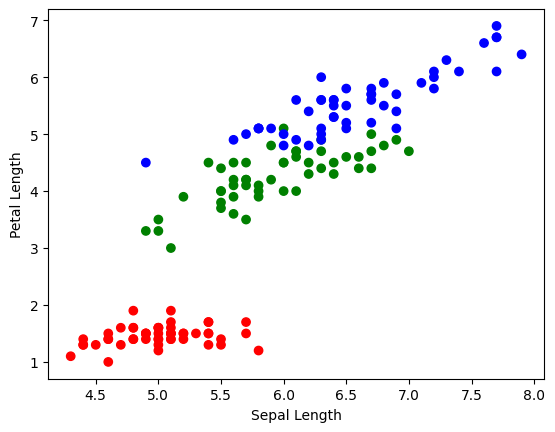

In [35]:
# Example: Sepal length vs. petal length
plt.scatter(iris_df['sepal_length'], iris_df['petal_length'], c=iris_df['class'].map({'Iris-setosa': 'red', 'Iris-versicolor': 'green', 'Iris-virginica': 'blue'}))
plt.xlabel('Sepal Length')
plt.ylabel('Petal Length')
plt.show()

# 4. Data Preprocessing 

In [36]:
X = iris_df[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']]
y = iris_df['class']

# Split the data into training and testing sets (e.g., 80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 5. Feature Scaling 

In [37]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# 6. Training the model 

In [38]:
svm_classifier = SVC(kernel='linear', C=1)
svm_classifier.fit(X_train, y_train)

SVC(C=1, kernel='linear')

# 7. Testing the model 

In [39]:
y_pred = svm_classifier.predict(X_test)

# 8. Model Evaluation 

In [44]:
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\n\nClassification Report:\n")
print(classification_report(y_test, y_pred))

accuracy = accuracy_score(y_test, y_pred)
print(f"\n\nAccuracy: {accuracy * 100:.2f}%")


Confusion Matrix:
[[10  0  0]
 [ 0  8  1]
 [ 0  0 11]]


Classification Report:

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       1.00      0.89      0.94         9
 Iris-virginica       0.92      1.00      0.96        11

       accuracy                           0.97        30
      macro avg       0.97      0.96      0.97        30
   weighted avg       0.97      0.97      0.97        30



Accuracy: 96.67%
